<hr style="height: 1px;">
<i>This notebook was authored by the 8.S50x Course Team, Copyright 2022 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

<h1>Guided Problem Set 10: Higgs Search Part I</h1>


<a name='section_10_0'></a>
<hr style="height: 1px;">


## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P10.0 Overview</h2>


<h3>Navigation</h3>

<table style="width:100%">
     <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_1">P10.1 Higgs Boson Search</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_10_1">P10.1 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_2">P10.2 Making Selections Part I</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_10_2">P10.2 Problems</a></td>
    </tr>
    <tr>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#section_10_3">P10.3 Making Selections Part II</a></td>
        <td style="text-align: left; vertical-align: top; font-size: 10pt;"><a href="#problems_10_3">P10.3 Problems</a></td>
    </tr>
</table>



<h3>Learning Objectives</h3>


In this Pset we will explore the following objectives:

- Understand the basis and broad strokes methods for the Higgs boson search
- Learn about selections needed to perform Higgs boson search and explore possible selection.
- Use a simulation to perform a simple hypothosis test and extract key parameters from the Higgs boson.

Note, this Pset begins with a lot of background information. Take your time and read carefully through the first section.


<h3>Data</h3>

>description: Higgs to 4 Leptons with CMS Open data from the Large Hadron Collider<br>
>source: https://zenodo.org/record/8034556 <br>
>attribution: Philip Harris (CMS Collaboration), DOI:10.5281/zenodo.8034556

In [1]:
#>>>RUN: P10.0-runcell00

!git init
!git remote add -f origin https://github.com/mitx-8s50/nb_LEARNER/
!git config core.sparseCheckout true
!echo 'P09' >> .git/info/sparse-checkout
!git pull origin main

hint: Using 'master' as the name for the initial branch. This default branch name
hint: is subject to change. To configure the initial branch name to use in all
hint: of your new repositories, which will suppress this warning, call:
hint: 
hint: 	git config --global init.defaultBranch <name>
hint: 
hint: Names commonly chosen instead of 'master' are 'main', 'trunk' and
hint: 'development'. The just-created branch can be renamed via this command:
hint: 
hint: 	git branch -m <name>
Initialized empty Git repository in /content/.git/
Updating origin
remote: Enumerating objects: 742, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 742 (delta 55), reused 52 (delta 52), pack-reused 625 (from 3)
Receiving objects: 100% (742/742), 37.42 MiB | 18.07 MiB/s, done.
Resolving deltas: 100% (348/348), done.
From https://github.com/mitx-8s50/nb_LEARNER
 * [new branch]      Alex       -> origin/Alex
 * [new branch]      main       -> o

In [2]:
#>>>RUN: P10.0-runcell01

# NOTE: some files are too large to include in the original repository, so you must download them from here:
# https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAXOXeEO9Bl_W6BUhV61kFpa?dl=0
#
# Ways to download:
#     1. Copy/paste the link (replace =0 with =1 to download automatically)
#     2. Use the wget commands below (works in Colab, but you may need to install wget if using locally)
#
# Location of files:
#     Move the files to the directory data/P09/MC
#
# Using wget: (works in Colab)
#     Upon downloading, the code below will move them to the appropriate directory

!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADnJ6f0zzYekvFunRpH13Gma/zzto2mu2e2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAgZQdH4nWP9dYUmDLWXfhXa/zzto2mu2e2012.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADepq5NkiLgh0uaij8P9p1Ka/zzto4e2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAA4FHGuNlPcfXHgwCcqZAyva/zzto4e2012.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAxiJAH_89oEYYvfMpFdtq4a/zzto4mu2011.csv?dl=0
!wget https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAD6lR-feTLWa1-GvYCsy8N5a/zzto4mu2012.csv?dl=0
!mv zzto2mu2e2011.csv?dl=0 data/P09/MC/zzto2mu2e2011.csv
!mv zzto2mu2e2012.csv?dl=0 data/P09/MC/zzto2mu2e2012.csv
!mv zzto4e2011.csv?dl=0 data/P09/MC/zzto4e2011.csv
!mv zzto4e2012.csv?dl=0 data/P09/MC/zzto4e2012.csv
!mv zzto4mu2011.csv?dl=0 data/P09/MC/zzto4mu2011.csv
!mv zzto4mu2012.csv?dl=0 data/P09/MC/zzto4mu2012.csv

--2025-02-25 17:50:41--  https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AADnJ6f0zzYekvFunRpH13Gma/zzto2mu2e2011.csv?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fo/203hqqiddz5r6njwo3yhi/AJ_rWAuU0pTl4Uxa09RUBlk/zzto2mu2e2011.csv?rlkey=5kh4rrsa2qv00xjzv53w0fhb7&dl=0 [following]
--2025-02-25 17:50:42--  https://www.dropbox.com/scl/fo/203hqqiddz5r6njwo3yhi/AJ_rWAuU0pTl4Uxa09RUBlk/zzto2mu2e2011.csv?rlkey=5kh4rrsa2qv00xjzv53w0fhb7&dl=0
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc807959cae7e9556c48e36317ae.dl.dropboxusercontent.com/cd/0/inline/Ckz20z2Yvut0cJ2_ryKlD65Pztwf3EnGPW6dVmuvUdBtoNPyZOOhreN-kuTMWHfqWbpMPkiwJ-i2I5B9pd9qL6bfda8IJ6dHDW0e3gsqZlFJ6mSzWkpTNcatKXe4UaKQP_bZQDNoR5vO7WCdNHGiU99H/file# [followi

<h3>Importing Libraries</h3>

Before beginning, run the cell below to import the relevant libraries for this notebook.

In [3]:
#>>>RUN: P10.0-runcell02

!pip install lmfit
!pip install dcor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.9/98.9 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.0 MB/s eta 0:00:00


In [4]:
#>>>RUN: P10.0-runcell03

import numpy as np
import pandas as pd
import math as mt
import scipy.optimize as opt
import scipy.stats as sta
import matplotlib.pyplot as plt
import csv

from scipy.optimize import curve_fit
import scipy
# from scipy.stats import norm
from scipy import stats
import lmfit

<h3>Setting Default Figure Parameters</h3>

The following code cell sets default values for figure parameters.

In [5]:
#>>>RUN: P10.0-runcell04

#set plot resolution
%config InlineBackend.figure_format = 'retina'

#set default figure parameters
plt.rcParams['figure.figsize'] = (9,6)

medium_size = 12
large_size = 15

plt.rc('font', size=medium_size)          # default text sizes
plt.rc('xtick', labelsize=medium_size)    # xtick labels
plt.rc('ytick', labelsize=medium_size)    # ytick labels
plt.rc('legend', fontsize=medium_size)    # legend
plt.rc('axes', titlesize=large_size)      # axes title
plt.rc('axes', labelsize=large_size)      # x and y labels
plt.rc('figure', titlesize=large_size)    # figure title


<a name='section_10_1'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P10.1 Higgs Boson Search Introduction</h2>   

| [Top](#section_10_0) | [Previous Section](#section_10_0) | [Problems](#problems_10_1) | [Next Section](#section_10_2) |

<h3> The Standard Model and the Higgs boson </h3>

The Standard Model (SM) describes the building blocks of our universe and successfully explains how they interact with each other. However, there are still unanswered questions that the SM cannot answer, like the mass of neutrinos and dark matter.

Among these unknowns, ten years ago, a foundational piece of the SM was still missing from our measurements - the Higgs boson. As one of the fundamental particles, it is the "mechanism that contributes to our understanding of the origin of mass of subatomic particles"[1]. Elementary particles acquire mass through their interaction with the Higgs field. It wasn't until 2012 that the Higgs boson discovery was announced by the ATLAS and CMS collaborations (on 4th July 2012). Evidence of a new particle with properties consistent with the SM-predicted Higgs boson was present in three decay modes, in both experiments:

- $H \to ZZ^* \to 4ℓ$
- $H \to \gamma\gamma$
- $H \to WW^* \to ℓ\nuℓ\nu$

While it's not important to memorize the standard model particle abriviations, the $H$ stands for Higgs boson, $Z$ stands for the Z boson, $\gamma$ stands for a photon, $ℓ$ stands for a lepton (for example an electron or a muon), and $\nu$ stands for neutrino.

[1] The Nobel Prize in Physics 2013

<h3>Objectives</h3>

In this pset, you are going to reproduce the Nobel prize winning discovery in the so-called "golden" channel, $H \to ZZ^* \to 4ℓ$, using the LHC open data of RUN I (2009 – 2013, 7-8TeV). The aim of this problem is to understand the decay of the Higgs boson to four leptons, and make use of the properties of the decay products to perform a Higgs boson search.

If interested, one can dig more with key words:
- Standard Model
- Higgs Boson

<h3> The Large Hadron Collider (LHC) and the CMS detector </h3>

The Large Hadron Collider (LHC) is the largest and highest-energy particle collider and the largest machine in the world. It lies in a 27km circular tunnel which is ~100m deep beneath the France–Switzerland border.

The LHC accelerates two beams of protons, in the opposite directions, to nearly the speed of light, and makes them collide. These collisions at super high energy produce large amounts of sub-atomic particles which allow physicists to probe the world of the infinitesmially small. The collisions happen at 4 points, where 4 detectors sit. The many layered CMS detector is one of them.

Different particles leave different "footprint" in CMS's layers, enabling identification of (nearly) all the stable particles produced in each collision. Measuring their momenta and energies and piecing together the information of all these particles, allows researchers to rebuild the whole collision. A figure of the specific particle interactions in a transverse slice of the detector, from the beam interaction region to the muon detector is shown below.

<p align="center">
<img alt="particle flow" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P09/particle_flow.png" width="700"/>
</p>

>source: https://arxiv.org/abs/1706.04965 <br>
>attribution: arXiv:1706.04965, CMS Collaboration

More at
LHC: https://home.cern/science/accelerators/large-hadron-collider <br>
CMS Detector: https://cms.cern/detector

<h3>The 4-Lepton Decay Channel</h3>

A decay's cross section is a measurement of the abundance of that decay inside a particle collider. The Higgs boson production cross section at the LHC is relatively small compared to those of other processes. In the dataset collected by the ATLAS and CMS experiments until June 2012 about 200,000 Higgs bosons with a mass of 125 GeV were expected, compared with the total number of proton-proton collisions recorded during that time $~10^{11}$. A sensitive channel for finding the Higgs boson is when it decays into four leptons, $H \to ZZ^* \to 4ℓ$ ($ℓ =$ electron or muon). The requirement of the presence of four leptons kills much of the background. For this reason, $H \to ZZ^* \to 4ℓ$ is referred to as "golden channel" of the Higgs boson decays. The Higgs boson invariant mass can be reconstructed with good precision and a sharp resonance of the Higgs boson can be searched for on top of the continuous backgrounds. Finding such a resonance constitutes a discovery of the Higgs boson.


The Feynman Diagram below shows the full chain of pp collision - Higgs boson production - $H \to ZZ^* \to 4ℓ$ decay. And the figure here is a real event display in the CMS detector of $H \to ZZ^* \to 4ℓ$.


<p align="center">
<img alt="lepton Higgs decay" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P09/4-lepton_Higgs_decay.svg" width="400"/>
<img alt="lepton Higgs decay" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P09/eventdisplay.png" width="400"/>
</p>

>source (left/upper): https://commons.wikimedia.org/wiki/File:4-lepton_Higgs_decay.svg <br>
>attribution (left/upper): Parcly Taxel, CC BY-SA 3.0, via Wikimedia Commons
>source (right/lower): data visualized with https://opendata.cern.ch/visualise/events/cms

In this decay, events are selected by firstly requiring the presence of four well reconstructed, isolated leptons ($\mu = $ muon or $e =$ electron). This step has already been performed on the data you will study in this problem. If you'd like more explanation on "well reconstructed" and "isolated", read the following two paragraphs:

>"The reconstructed location of the proton-proton interaction is referred to as the primary vertex — charged particle tracks reconstructed in the tracking devices converge at this point. A secondary vertex occurs when a particle originating from the interaction decays after travelling some distance from the primary vertex. The impact parameter (IP) of a reconstructed charged particle track is its distance of closest approach to the primary vertex. The magnitude of the impact parameter can be used to discriminate between the tracks of particles which originated in the interaction and those of particles produced from the decay of a relatively long-lived product of the interaction (for example a b-hadron) even if it is not possible to reconstruct a secondary vertex.
>
> Leptons and photons originating from a hard interaction, or from the decay chain of a particle, such as a Z boson or Higgs boson, directly produced in a hard interaction are not (except by chance) closely accompanied by other particles — they are isolated. Many lepton and photon candidates reconstructed in the detector do not originate directly from the hard interaction, but come from the constituents of the jets of particles formed by the hadronization of gluons or quarks. These candidates tend not to be isolated — they are surrounded by other particles from the jet. A measure of how many particles, or how much energy, surrounds a candidate lepton or photon can be used to determine whether it is probable that it emerged directly from the hard interaction, or more likely that it originated in a jet fragment."
>
>Karl Jakobs and Chris Seez (2015) <a href="http://www.scholarpedia.org/article/The_Higgs_Boson_discovery" target="_blank">The Higgs Boson discovery</a>. <a href="http://www.scholarpedia.org/" target="_blank">Scholarpedia</a>, 10(9):32413.


<h3>Considering the Background</h3>

Regardless of the relatively clean and clear signature, there are still large backgrounds from different collision processes. You'll be performing a search for a resonance peak in the four-lepton invariant mass spectrum, against the large irreducible ZZ* background. The invariant mass is $m = \sqrt{E^2 - (px^2 + py^2 + pz^2)}$, it is the usual 4-vector invariant mass. The reason why such a search is difficult is that it is few signal events against thousands or sometimes even millions of background events; the signal can easily be covered/erased by statistical fluctuations.

To safely and scientifically interpret the data, in particle physics, an excess in data with $5\sigma$ deviation from the background-only hypothesis is quoted as "discovery".  In channel $H \to ZZ^* \to 4ℓ$ alone, 3.2 standard deviation is reported in original publication (together with other channels more than $5\sigma$ is reported)[5]. In this homework, due to the less sophisticated background suppression, it would already be good if a ~$2\sigma$ excess can be reached. Perhaps in part 3.7, we might get to the point of "evidence" ($3\sigma$) for the Higgs, but we will have to use some deep learning to help us.

You can compare your results with the one in publication as shown below:

<p align="center">
<img alt="published data" src="https://raw.githubusercontent.com/mitx-8s50/images/main/P09/InvMass_publication.png" width="500"/>
</p>

>source: https://arxiv.org/abs/1207.7235 <br>
>attribution: arXiv:1207.7235, CMS Collaboration



The key is to understand the relevant physics for this process and the decay products' properties. Then based on one's understanding, make data selections to maximize the signal-to-background ratio. Making a selection means cutting out events based on properties of the events, with the goal of removing more background than signal events.

Along with the data, you are provided with the results of Monte Carlo (MC) simulations of different collision processes. Since the MC results are generated with known input processes, you can see how the cuts you apply affect the signal and background MC processes. You will choose cuts that maximize the strength of the signal over the background.

While we help you in the code, its good to know how we predict the number of MC events. The way we do this is

1. We simulate the sample and compute the cross section $\sigma$ of our simulated sample. The units for $\sigma$ are in picobarns (pb=$10^{-40} m^{2}$)
2. For our simulated sample we generate $N_{mc}$ events
3. We compute the total luminosity$\mathcal{L}$ (ie number of total collisions) of the dataset that we want to apply our MC to. The units for $\mathcal{L}$ are in inverse picobarns $1/$pb, that way we can cancel it with cross section
4. The total events in the data of our predicted sample is given by $N_{tot}=\mathcal{L}\sigma$, so what we do is compute an event weight given by $w=N_{tot}/N_{mc}$, which corresponds to the fraction of an event each simulated MC event corresponds to.

We typically design our setup so that $w \ll 1$ that way we have way more MC events than our data. Additionally, you will notice that Nevents is precomputed for you. This is because our simulations are done without the pre-selections that we have applied, so we need to compute these before hand for you. The first part of the code will compute the weights for you.



<h3> Data and MC </h3>

The data that we are using consists of a LHC collider data of the CMS detector from 2011 and 2012, consisting of at least 4 leptons (lepton is electron or muon requiring loose lepton identification and isolation criteria).

The Monte Carlo simulation consists of a simulation of the main processes expected in a 4 lepton selection including ZZ (double Z boson production ), WZ(W boson + Z boson production), (Z+jets production with  2 leptons from the Z decay and 2 fake letpons from jets in the event) and the Higgs boson decaying to 2 z bosons. Simulations are produced using detailed quantum field theory calcualtions of the production differential cross section and then passed through proton collision simulations, which effectively smear out the momenta of the collision by inserting these productions within the internal system of a proton.

- In the data and MC folders, you're provided collections of four well constructed and isolated leptons
    - File format: .csv for processing convenience with Jupyter Notebook
    - Each entry contains 34 elements: Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,PID2,Q2,E2,px2,py2,pz2,eta2,phi2,PID3,Q3,E3,px3,py3,pz3,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4.         
        - They are: the Run number and event number of this event (used to label the event), the type of the lepton labelled by its particle ID (PID) number (you can find which number corresponds to which particle in this link http://pdg.lbl.gov/2007/reviews/montecarlorpp.pdf, for ex. PID = 11 means an electron). Additionially Q tells what the charge of the particle is and the rest of the variables represent kinematic information of the four leptons (their energy(E), momentum(px,py,pz), and eta and phi (cylindrical angles))

    - Files are separated by year (2011/2012), and process (for MC)
        

- Some concepts relevant to the file:
    - The pseudorapidity, $\eta$ , ~eta in the file, is defined as $\eta = -ln(\tan(\theta/2))$, where $\theta$ is the polar angle measured from the anticlockwise beam direction.
    - The azimuthal angle, $\phi$, ~phi in the file, measured the axis defined by the beam directions
        - $\eta$ - $\phi$ space gives a coordinate system
    - The transverse momentum, pT, denotes the component of momentum perpendicular to the beam axis (in the x-y plane).
    - You may read more on the coordinates system from https://www.lhc-closer.es/taking_a_closer_look_at_lhc/0.momentum

<h3> Code and work flow </h3>

The code below provides a beginning of the analysis: open the file, read the entries, plot some distributions, and make the publication-plot you need to perform your search: the invariant mass of the four leptons.

Although both the data and MC are already pre-processed, they're still far from sufficiently cleaned to claim a Higgs boson peak. Your goal here is to observe the data, make selections on the events, and reconstruct the four leptons invariant mass after the selection to try to reproduce the peak as in the publication. Remember, the dataset provided here are small because of pre-processing. In reality, you may face millions, billions or even more number of events to deal with!

Now let's walk through the code!

<h4>Loading the data</h4>

First, we define a bunch of constants, and load the data.

In [7]:
#>>>RUN: P10.1-runcell01

## some scale factors and constants relevant to the data

## mass squared of muon: m_muon^2 (in GeV)
sqm1 = (0.105658) * (0.105658)
## mass squared of electron: m_e^2 (in GeV)
sqme = (0.0005109989) * (0.0005109989)
## mass of Z boson (in GeV)
mZ = 91.1876


## constants for the scale factor of MC. The MC is produced at a certain cross section
## with a certain number of events. To increase statistics, the event numbers generated are usually very large,
## therefore a scale factor is needed to apply on the MC to make them agree with data.
## Scale factor for each MC component is: lumi * xsec / nevt, as provided below

## Luminosity of each year in pb
lumi12 = 11580.
lumi11 = 2330.

## MC cross section of each process
xsecZZ412 = 0.107
xsecZZ2mu2e12 = 0.249
xsecZZ411 = 0.093
xsecZZ2mu2e11 = 0.208

xsecTTBar12 = 200.
xsecTTBar11 = 19.504

xsecDY5012 = 2955.
xsecDY1012 = 10.742
xsecDY5011 = 2475.
xsecDY1011 = 9507.

scalexsecHZZ12 = 0.0065
scalexsecHZZ11 = 0.0057

## Number of MC Events generated for each process
nevtZZ4mu12 = 1499064
nevtZZ4e12 = 1499093
nevtZZ2mu2e12 = 1497445
nevtHZZ12 = 299973
nevtTTBar12 = 6423106
nevtDY5012 = 29426492
nevtDY1012 = 6462290

nevtZZ4mu11 = 1447136
nevtZZ4e11 = 1493308
nevtZZ2mu2e11 = 1479879
nevtHZZ11 = 299683
nevtTTBar11 = 9771205
nevtDY5011 = 36408225
nevtDY1011 = 39909640


labels = ['$m_{H}$ = 125 GeV', r'ZZ $\rightarrow$ 4l', 'Z/$\gamma^{*}$ + X', r'$t\bar{t}$']
colors = ['r','b','g','gray']

#now we compute the event weights
scales_higgs = [lumi11*scalexsecHZZ11/nevtHZZ11, lumi12*scalexsecHZZ12/nevtHZZ12]
scales_zz = [lumi11*xsecZZ411/nevtZZ4mu11, lumi11*xsecZZ2mu2e11/nevtZZ2mu2e11, lumi11*xsecZZ411/nevtZZ4e11,\
             lumi12*xsecZZ412/nevtZZ4mu12, lumi12*xsecZZ2mu2e12/nevtZZ2mu2e12, lumi12*xsecZZ412/nevtZZ4e12]
scales_dy = [lumi11*xsecDY1011/nevtDY1011, lumi11*xsecDY5011/nevtDY5011, \
             lumi12*xsecDY1012/nevtDY1012, lumi11*xsecDY5012/nevtDY5012]
scales_tt = [lumi11*xsecTTBar11/nevtTTBar11, lumi12*xsecTTBar12/nevtTTBar12]

In [8]:
#>>>RUN: P10.1-runcell02

### open the files ###
# read datalist of each year and combine to one

def loaddata():
    data_year  = [pd.read_csv('data/P09/clean_data_2011.csv',index_col=None, header=0)]
    data_year += [pd.read_csv('data/P09/clean_data_2012.csv',index_col=None, header=0)]
    pdata = pd.concat(data_year,axis=0,ignore_index=True)
    return pdata

data=loaddata()

<h4>Loading the background</h4>

Now that we have the data, we want to load the background processes. The backgrounds have the weights that are listed above.

In [9]:
#>>>RUN: P10.1-runcell03

## ZZ*
#NOTE: these zz* files are too large to include the original repository, so you must download them here:
#https://www.dropbox.com/sh/wf7d42jg4mfbdlh/AAAXOXeEO9Bl_W6BUhV61kFpa?dl=0
#Run cell P10.6-runcell01 to do this

def loadMC():
    # read MClist of each process and each year
    mc_higgs_11 = pd.read_csv('data/P09/MC/higgs2011.csv',index_col=None, header=0)
    mc_higgs_12 = pd.read_csv('data/P09/MC/higgs2012.csv',index_col=None, header=0)
    ## Drell-Yan
    mc_dy10_11 = pd.read_csv('data/P09/MC/dy1050_2011.csv',index_col=None, header=0)
    mc_dy50_11 = pd.read_csv('data/P09/MC/dy50_2011.csv',index_col=None, header=0)
    mc_dy10_12 = pd.read_csv('data/P09/MC/dy1050_2012.csv',index_col=None, header=0)
    mc_dy50_12 = pd.read_csv('data/P09/MC/dy50_2012.csv',index_col=None, header=0)
    ## ttbar
    mc_ttbar_11 = pd.read_csv('data/P09/MC/ttbar2011.csv',index_col=None, header=0)
    mc_ttbar_12 = pd.read_csv('data/P09/MC/ttbar2012.csv',index_col=None, header=0)
    ##zz
    mc_zz4mu_11 = pd.read_csv('data/P09/MC/zzto4mu2011.csv',index_col=None, header=0)
    mc_zz2mu2e_11 = pd.read_csv('data/P09/MC/zzto2mu2e2011.csv',index_col=None, header=0)
    mc_zz4e_11 = pd.read_csv('data/P09/MC/zzto4e2011.csv',index_col=None, header=0)
    mc_zz4mu_12 = pd.read_csv('data/P09/MC/zzto4mu2012.csv',index_col=None, header=0)
    mc_zz2mu2e_12 = pd.read_csv('data/P09/MC/zzto2mu2e2012.csv',index_col=None, header=0)
    mc_zz4e_12 = pd.read_csv('data/P09/MC/zzto4e2012.csv',index_col=None, header=0)

    # create a combined list of MC
    mc_higgs = [mc_higgs_11, mc_higgs_12]
    mc_zz = [mc_zz4mu_11, mc_zz2mu2e_11, mc_zz4e_11, mc_zz4mu_12, mc_zz2mu2e_12, mc_zz4e_12]
    mc_dy = [mc_dy10_11, mc_dy50_11, mc_dy10_12, mc_dy50_12]
    mc_tt = [mc_ttbar_11, mc_ttbar_12]

    out_mc_sig = pd.concat(mc_higgs,axis=0,ignore_index=True)
    out_mc_bkg_zz = pd.concat(mc_zz,axis=0,ignore_index=True)
    out_mc_bkg_dy = pd.concat(mc_dy,axis=0,ignore_index=True)
    out_mc_bkg_tt = pd.concat(mc_tt,axis=0,ignore_index=True)

    ## For Selections:
    out_mc_all = [mc_higgs, mc_zz, mc_dy, mc_tt]
    return out_mc_all,out_mc_sig,out_mc_bkg_zz,out_mc_bkg_dy,out_mc_bkg_tt

mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()

<h4>Defining basic functions</h4>

Now, finally lets define some basic functions to read out CSV file, and compute the transverse momentum $p_{T}=\sqrt{p_{x}^{2}+p_{y}^2}$, the invariant mass $m=\sqrt{E^{2}-\vec{p}^2}$ and the invariant mass of the 4-lepton 4-vector system, defined as

$$
\vec{p}_{\rm system} = \vec{p}_{1} + \vec{p}_{2} + \vec{p}_{3} + \vec{p}_{4}
$$

The mass of this 4-vector is computed just like any other 4-vector, namely with the computation: `np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))`

In [11]:
#>>>RUN: P10.1-runcell04

#This is the header of the csv file:
#Run,Event,PID1,Q1,E1,px1,py1,pz1,eta1,phi1,PID2,Q2,E2,px2,py2,pz2,eta2,phi2,PID3,Q3,E3,px3,py3,pz3,eta3,phi3,PID4,Q4,E4,px4,py4,pz4,eta4,phi4
def ReadEntries(lis):
    return lis['PID1'],lis['Q1'],lis['E1'],lis['px1'],lis['py1'],lis['pz1'],lis['eta1'],lis['phi1'], \
    lis['PID2'],lis['Q2'],lis['E2'],lis['px2'],lis['py2'],lis['pz2'],lis['eta2'],lis['phi2'], \
    lis['PID3'],lis['Q3'],lis['E3'],lis['px3'],lis['py3'],lis['pz3'],lis['eta3'],lis['phi3'], \
    lis['PID4'],lis['Q4'],lis['E4'],lis['px4'],lis['py4'],lis['pz4'],lis['eta4'],lis['phi4']

def pt(px, py):
    return np.sqrt(px**2 + py**2)

def invMass(E, px, py, pz):
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))

def InvMass_4l(lists):   ### faster way to get the 4l-system invMass directly from the list, as you may repeately run it for the final plot###
    E_tot = lists['E1'] + lists['E2'] + lists['E3'] + lists['E4']
    px_tot = lists['px1'] + lists['px2'] + lists['px3'] + lists['px4']
    py_tot = lists['py1'] + lists['py2'] + lists['py3'] + lists['py4']
    pz_tot = lists['pz1'] + lists['pz2'] + lists['pz3'] + lists['pz4']
    return np.sqrt(E_tot**2 - (px_tot**2 + py_tot**2 + pz_tot**2))

<h4>Improving signal to noise</h4>

Now, we aim to select data that will improve our signal to noise. To make selections on the events, we must understand the signature of the signal (Higgs) process and make use of that signature to suppress the background, but without hurting the signal yields. That is to say, find out features that the signal has but background doesn't and make a filter based on those features. This is called making a "cut".

A way physicists usually make data selections is to make use of Monte Carlo simulations (MC). Since MC is generated from known processes, you can check distributions of the variables which you think might be different between signal and background data processes with signal and background MC processes, to see whether you want to apply a cut on this variable to clean up the data.

Let's see some examples below:

In [12]:
#>>>RUN: P10.1-runcell05

## function for making histograms of different data features
def PlotShape(variable, rmin, rmax, nbins):
    for i,var in enumerate(variable):
        hist, bins = np.histogram(var, bins = nbins, range = (rmin,rmax))
        bincenter = 0.5 * (bins[:-1] + bins[1:])
        plt.plot(bincenter, hist * (1./len(var)), color = colors[i], label=labels[i],drawstyle = 'steps-mid')
    plt.legend(fontsize = 12)

So we are going to load a lot of different processes below, these correspond to the different backgrounds, and the Higgs signal. All of these are simulation. The list of processes are given by:

>sig = This is the Higgs boson
>
>zz  = This is di-Z boson production background
>
>dy = this is Z boson (drell-yan) production in to 2 leptons + 2 fake leptons
>
>tt = this is top pair prodcution decaying into 2 leptons + 2 fake leptons

Let's go aheand plot the properties of these different processes.

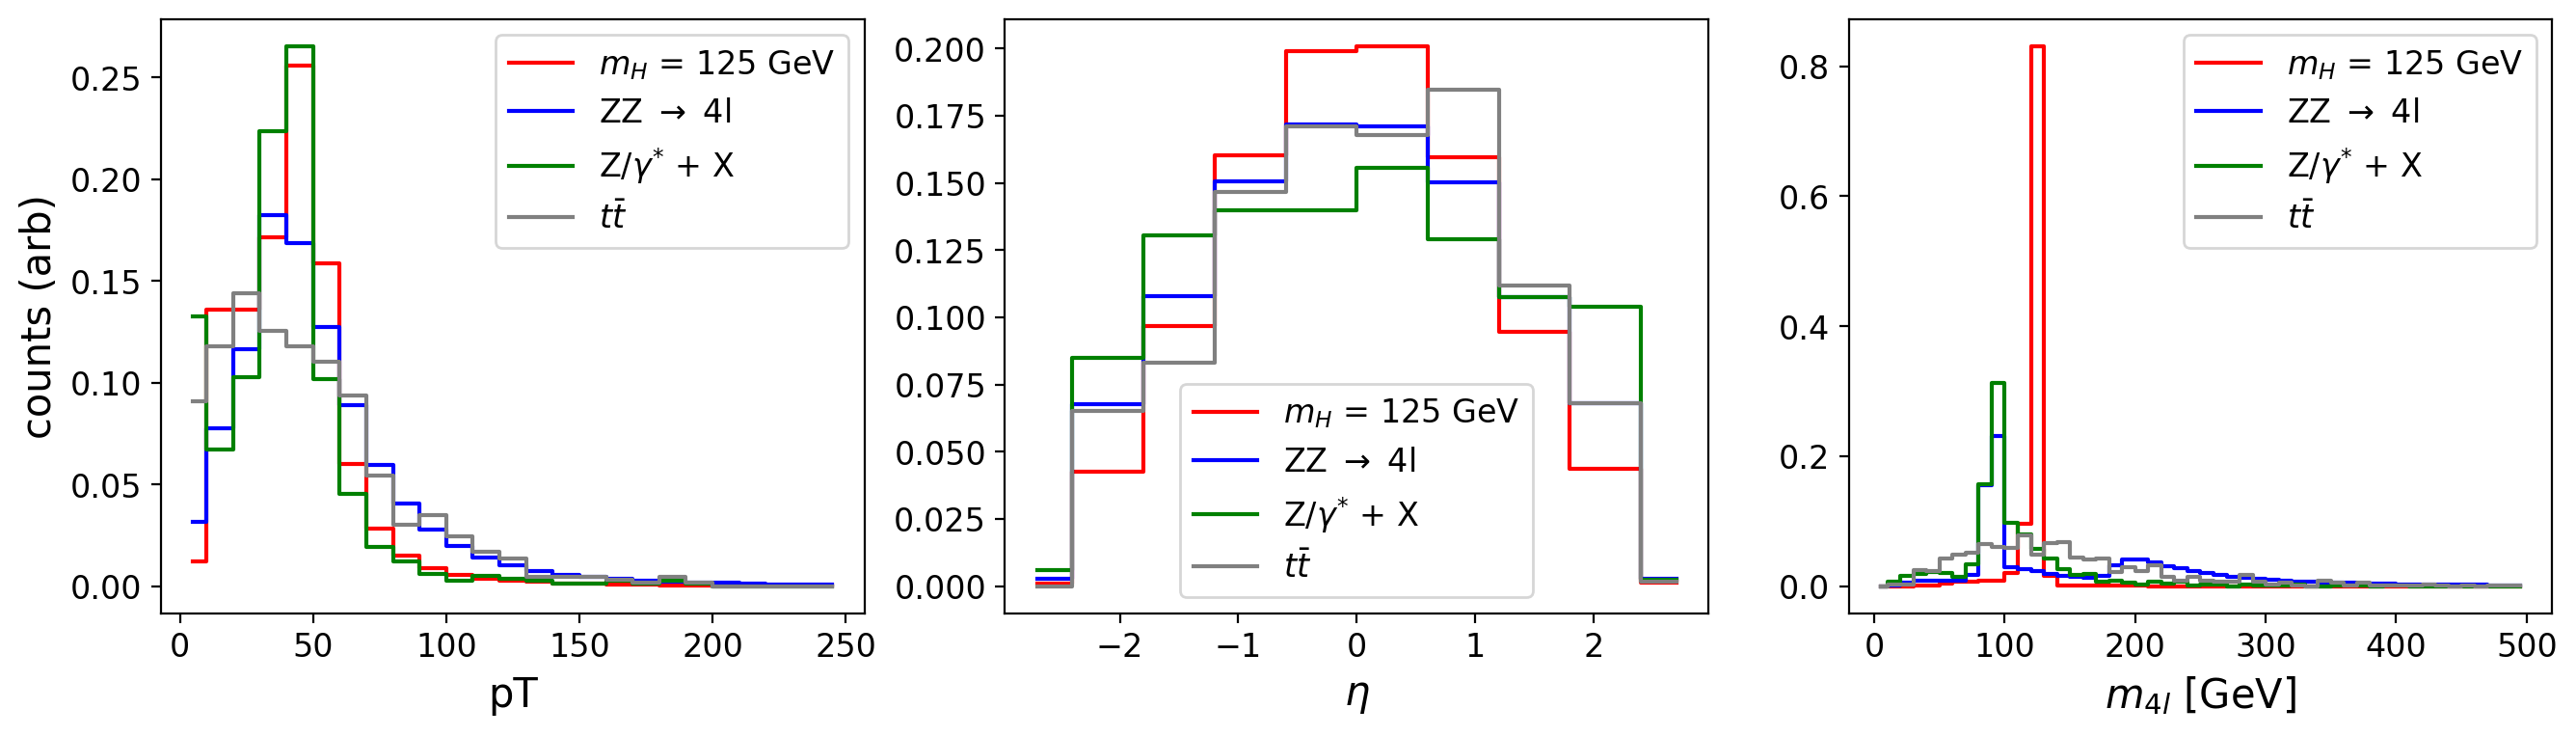

In [13]:
#>>>RUN: P10.1-runcell06

## Plots of transverse momenta, psuedorapidity, and invariant mass for different known processes, using the MC results.
## The plots allow you to see how the Higgs signal compares to the background signal for these parameters.
pt1_sig = pt(mc_sig['px1'], mc_sig['py1'])
pt1_bkg_zz = pt(mc_bkg_zz['px1'], mc_bkg_zz['py1'])
pt1_bkg_dy = pt(mc_bkg_dy['px1'], mc_bkg_dy['py1'])
pt1_bkg_tt = pt(mc_bkg_tt['px1'], mc_bkg_tt['py1'])

pt1 = [pt1_sig,pt1_bkg_zz,pt1_bkg_dy,pt1_bkg_tt]
eta1 = [mc_sig['eta1'], mc_bkg_zz['eta1'], mc_bkg_dy['eta1'], mc_bkg_tt['eta1']]
invM4l = [InvMass_4l(mc_sig),InvMass_4l(mc_bkg_zz),InvMass_4l(mc_bkg_dy),InvMass_4l(mc_bkg_tt)]

plt.figure(figsize = (16,4))
plt.subplot(1, 3, 1)
plt.ylabel('counts (arb)')
plt.xlabel('pT')
PlotShape(pt1, 0, 250, 25)
plt.subplot(1, 3, 2)
plt.xlabel('$\eta$')
PlotShape(eta1, -3, 3, 10)
plt.subplot(1, 3, 3)
plt.xlabel('$m_{4l}$ [GeV]')
PlotShape(invM4l, 0, 500, 50)

As we can see, the most distinct difference between the signal can be seen in the 4l invariant mass (rightmost figure). Therefore, this is the distribution on top of which we'll be looking for the Higgs boson. A peak around 125GeV is a unique sign of the signal. In most analysis, we would see distinct shapes of a series of variables' distributions. Then we use the ones with the greatest separation between signal and background to perform the final fit.

<a name='problems_10_1'></a>     

| [Top](#section_10_0) | [Restart Section](#section_10_1) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 10.1.1</span>

In the last plot above, what distinguishes the Higgs peak from the others? Select the correct answer from the options below:

A) The Higgs is a narrow resonance and has a narrow mass peak.\
B) The Higgs plot color is red.\
C) The Higgs has more momentum of the individual particles.\
D) All of the above.\
E) None of the above.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 10.1.2</span>

What is the mass peak at 91 GeV in the other backgrounds?

HINT: A lot of particle physicists reference little "booklets" which give key properties of various subatomic particles. A common booklet can be found <a href="https://pdg.lbl.gov/" target="_blank">here</a>. You may find the information under "particle listings" useful.

A) W boson\
B) Higgs boson\
C) top quark\
D) Z boson

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 10.1.3</span>

Consider a decay with 1 electron, 1 positron, and 2 neutrinos. This is not the type of process we will be considering in the rest of this assignment, but it will enable us to do a simple calculation in this problem. Namely, our goal is to predict weather this decay is likely to have come from a Higgs Boson. To do this, we can sum the momentum 4-vector $(E, p_x, p_y, p_z)$ of a decay's products to get the parent. Then we'll compute the invariant mass of the parent and see if it is close to the Higgs mass. Luckily, neutrinos have very little mass and therefore usually carry very little momentum and energy, so for simplicity we will ignore them.

From the detector, we know the following properties of the other particles:

- Electron: $p_T = 10$ GeV; $\eta = 0.24; \phi=2.9; E = 83$ GeV
- Positron: $p_T = 8$ GeV; $\eta = -0.31; \phi=-1.1; E = 42$ GeV

Use the formulas in this section to calculate the momentum and invariant mass of the particles. Enter a list which contains `[total momentum of electron, total momentum of positron, invariant mass of parent]`.

HINT: You are given the 4-momentum in $(p_T, \eta, \phi, E)$ coordinates. Try converting the 4 momentum of the particles into $(E, p_x, p_y, p_z)$, then use the `invMass` function that we defined earlier in this section. The following definitions will be helpful:

$$\theta = 2 \tan^{-1}(e^{-\eta})$$
$$|\vec{p}| = \frac{p_T}{sin(\theta)}$$
$$p_x = |\vec{p}|\sin(\theta)\cos(\phi)$$
$$p_y = |\vec{p}|\sin(\theta)\sin(\phi)$$
$$p_z = |\vec{p}|\cos(\theta)$$


In [14]:
#>>>RUN: P10.1-runcell04

def return_mom(pT,eta,phi):
    theta = 2*np.arctan(np.exp(-eta))
    p = pT/np.sin(theta)
    px = p*np.sin(theta)*np.cos(phi)
    py = p*np.sin(theta)*np.sin(phi)
    pz = p*np.cos(theta)
    p_tot = np.sqrt(px**2 + py**2 + pz**2)
    return p_tot, px, py, pz

def invMass(E, px, py, pz):
    return np.sqrt(E**2 - (px**2 + py**2 + pz**2))

p_tot_e, px_tot_e, py_tot_e, pz_tot_e = return_mom(10,0.24,2.9)
p_tot_p, px_tot_p, py_tot_p, pz_tot_p = return_mom(8,-0.31,-1.1)

#Calculate the relevant quantities below, then print

E_tot = 83 + 42
px_tot = px_tot_e + px_tot_p
py_tot = py_tot_e + py_tot_p
pz_tot = pz_tot_e + pz_tot_p

print("total momentum of electron:", p_tot_e)
print("total momentum of positron:", p_tot_p)
print("invariant mass:", invMass(E_tot, px_tot, py_tot, pz_tot))

total momentum of electron: 10.28938505693979
total momentum of positron: 8.387488281425869
invariant mass: 124.76206798502763


<a name='section_10_2'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P10.2 Making Selections Part I</h2>   

| [Top](#section_10_0) | [Previous Section](#section_10_1) | [Problems](#problems_10_2) | [Next Section](#section_10_3) |

<h3>Overview</h3>

In this short section, we want to consider how we will select events to include in our analysis. In order to make selections, you may want to consider the following:

- Should flavor and charge be conserved in all decay processes?

- The Higgs to four leptons decay channel involves an intermediate step $H \to ZZ^* \to 4ℓ$. How does the intermediate process, and constraints on the Z boson, affect the mass of the final leptons? (question: how can the Higgs boson, as a particle of 125 GeV, decay via two Z bosons, with a sum of mass greater than the mass of the Higgs?)

- You may want to read the original publication of the Higgs discovery[2]. The Hto4L part is on page 10, section 5.2 and provides sufficient information to make the data cuts for this assignment. Note that the Final-state radiation(FSR) correction part can be ignored since the photon information is not included in the dataset here.

- Although the data and MC have been pre-processed to collections of four leptons, you may want to know what pre-processing has been done. This includes using data with:
    - Transverse impact parameter w.r.t. primary vertex, |dxy| < 0.5 cm
    - Longitudinal impact parameter w.r.t. primary vertex, |dz| < 1 cm
    - 3D impact parameter significance, |SIP| < 4, where SIP = $I \sigma_I$, I is the 3D lepton impact parameter, and $\sigma_I$ is its uncertainty. This is to ensure that the lepton pairs from Z boson decays originate from the same primary vertex.
    - Muon and electron selection
        - Relative isolation of the lepton: relIso < 0.4 with $\Delta R$ = 0.4, where $\Delta R = \sqrt{(\Delta\eta)^2 + (\Delta\phi)^2}$, and relIso is defined as the scalar sum of the transverse momenta of the particles reconstructed within a distance $\Delta R$ of the object, normalised to the pT of the object; to quantify how isolated this object is.
        - You may want to apply more selections on the leptons?
  
You are encourage to read through the relevant paper, <a href="https://arxiv.org/pdf/1207.7235.pdf" target="_blank">here</a>, to learn more about these criteria.

<a name='problems_10_2'></a>     

| [Top](#section_10_0) | [Restart Section](#section_10_2) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 10.2.1</span>

In addition to lepton flavor conservation, another conservation law needs to be enforced in our selections. In the lab frame, what other property of the four leptons do we need to conserve in our selections that is a fundamental Higgs property?

A) charge conservation\
B) energy conservation\
C) momentum conservation

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 10.2.2</span>

When making selections, we need to make a minimum mass requirement to avoid something called the <a href="https://en.wikipedia.org/wiki/Upsilon_meson" target="_blank">Upsilon resonance</a>. The Upsilon also decays to electron and muon pairs, so we want to exclude this from our signal.

Thus, in the Higgs to 4-lepton decays that we are considering (e.g., 2 muons and 2 electrons, 4 muons, or 4 electrons), what is the lowest invariant mass that the lower mass lepton pair should have, such that we do not include Upsilon particles as possible parent particles? Report your answer as a integer in units of GeV/c^2.

This value can be found in <a href="https://arxiv.org/pdf/1207.7235.pdf" target="_blank">here</a>. You will need to input this value into the `evt` function in the next section.

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 10.2.3</span>

Additionally, we must define an upper mass limit for our selection. We want to avoid the resonance at 91 GeV, alluded to in a previous problem. By going much lower than this, we avoid the resonance but let in more background. By going higher, we reduce our background, but also our signal. In reality, you can do a detailed optimization, but in practice any number thats far away from the resonance and greater than the min mass will work.

With these considerations, what is a reasonable value for the lowest invariant mass that the higher mass lepton pair should have? Again, this value can be found in <a href="https://arxiv.org/pdf/1207.7235.pdf" target="_blank">here</a>. You will need to input this value into the `evt` function in the next section.


Report your answer as a integer, in units of GeV/c^2.



<a name='section_10_3'></a>
<hr style="height: 1px;">

## <h2 style="border:1px; border-style:solid; padding: 0.25em; color: #FFFFFF; background-color: #90409C">P10.3 Making Selections Part II</h2>   

| [Top](#section_10_0) | [Previous Section](#section_10_2) | [Problems](#problems_10_3) |

<h3>Overview</h3>

Now we can make selections on the data. Below are four functions to help make these selections:

- `obj`: Function to perform object selection for a single object. Currently as an example, we apply a pt cut on the objects: if it is a muon, require pt > 5GeV, while for electron pt must be greater than 7 GeV. These numbers can be found in the Higgs publication <a href="https://arxiv.org/pdf/1207.7235.pdf" target="_blank">[2]</a>

- `objsel`: For a given dataset, add a new column called "PassObj", which has a boolean value to indicate whether this event passes the object selection. Only when all 4 leptons pass the single object selection, we mark it as 1, otherwise it is 0. Iterate each event to assign the value of "PassObj"

- `evt`: Event selection. As an example, we simply applied PID1==11 and PID2=-11 to check that the first lepton is an electron and the second lepton is an anti-electron (positron). For example, if the Higgs decays to 2e2mu (2 electrons and 2 muons), the electrons potentially pair.

- `evtsel`: same as function `objsel. A new column is added called "PassEvt" to indicate whether and event passes the evet selection or not.

<h3>Applying the selections</h3>

Next, we apply selections both to the data and MC results. From the print out of data, you can see that there are two more columns at the end of each event: "PassObj" and "PassEvt". Then we make the selection: require an event to pass both the object and event selection by: `data = data.query('PassObj == 1 and PassEvt == 1')`

Go ahead and run the next few cells to select events. By default, the values of `lowerMinMass` and `upperMinMass` are set to 0, so non-Higgs resonant phenomena may be obscuring the signal. Afterwards, try rerunning the cells when setting the appropriate values that you found in the previous section. We will further refine our selection criteria in the problems at the end.

In [15]:
#>>>RUN: P10.3-runcell01

def obj(pid,px,py,eta):  ## object selection for a single object
    pt_obj = pt(px,py)
    if (np.abs(pid) == 13 and pt_obj > 5.) or (np.abs(pid) == 11 and pt_obj > 7.):## requires electrons and muons to have transverse momenta above certain level
        return 1
    else:
        return 0


def objsel(lis):  ## Create column indicating whether this event passes the object selection
    pass_obj = []
    for row in lis.itertuples():   ## loop over each event(each row)
        pass_obj.append(obj(row.PID1,row.px1,row.py1,row.eta1) and obj(row.PID2,row.px2,row.py2,row.eta2) and obj(row.PID3,row.px3,row.py3,row.eta3) and obj(row.PID4,row.px4,row.py4,row.eta4))
    lis['PassObj'] = pass_obj

In [16]:
#>>>RUN: P10.3-runcell02

## Include your values for the upper and lower invariant mass of the leptop pairs
def evt(PID1,Q1,E1,px1,py1,pz1,PID2,Q2,E2,px2,py2,pz2,PID3,Q3,E3,px3,py3,pz3,PID4,Q4,E4,px4,py4,pz4):

    if Q1+Q2+Q3+Q4 != 0: #Charge conservation
        return 0

    ### All Pairwise Mass combinations
    ##c1
    m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
    m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
    ##c2
    m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
    m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
    ##c3
    m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
    m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))

    ###NOTE: IF YOU DID NOT PREVIOUSLY DEFINE THE `lowerMinMass` and `upperMinMass`, do so here
    lowerMinMass = 12 #YOUR VALUE HERE
    upperMinMass = 40 #YOUR VALUE HERE

    ## to compare to the distribution without this selection, input 0 to the lower and upper MinMass.
    ## the difference shows the importance of these selections

    #note that the selections for lepton pairs can be improved your max and mins can be better than below
    if max(m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3) < upperMinMass:
        return 0
    if min(m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3) < lowerMinMass:
        return 0

    return 1



def evtsel(lis):   ### Similar as the Function: objsel shown above
    pass_evt = []
    for row in lis.itertuples():
        pass_evt.append(evt(row.PID1,row.Q1,row.E1,row.px1,row.py1,row.pz1,\
                            row.PID2,row.Q2,row.E2,row.px2,row.py2,row.pz2,\
                            row.PID3,row.Q3,row.E3,row.px3,row.py3,row.pz3,\
                            row.PID4,row.Q4,row.E4,row.px4,row.py4,row.pz4))
    lis['PassEvt'] = pass_evt

In [17]:
#>>>RUN: P10.3-runcell03

### Apply object selection and event selection to data and each MC process###
### This will take a little time to run, about a minute###
### You may see Runtime warnings regarding "invalid value encountered in sqrt"###

#Select Data
objsel(data)
evtsel(data)
sel_data = data.query('PassObj == 1 and PassEvt == 1')

#Select MC
mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()
for i,bkg in enumerate(mc_all):
    for j,pro in enumerate(bkg):
        objsel(pro)
        evtsel(pro)
        mc_all[i][j] = pro.query('PassObj == 1 and PassEvt == 1')

<ipython-input-16-a40972855f26>:12: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
<ipython-input-16-a40972855f26>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
<ipython-input-16-a40972855f26>:15: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
<ipython-input-16-a40972855f26>:14: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
<ipython-input-16-a40972855f26>:18: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-16-a40972855f26>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
<ipython-i

<h3>Making the plot</h3>

Now, let's take a look at the data and make the invariant mass plot! Consider what the code is doing below:

The function `HistInvMass4l` iterates over the `lis` list, and for each event in `lis`, it calculates the invariant mass using the `InvMass_4l` function defined in runcell `P10.1-runcell04`. Then, it generates a histogram of the invariant mass values. The resulting histogram is multiplied by the corresponding scaling factor and added to a list `hist_lis`. The sum of all histograms in `hist_lis` is returned.

The function `makeAllHists` calls `HistInvMass4l` four times, each time passing in the appropriate event type and scaling factors from the `imc list`. It generates histograms for each event type and stores them in separate variables (`hist_higgs`, `hist_zz`, `hist_dy`, `hist_tt`). These histograms represent the Monte Carlo (MC) simulations.

Then, it calculates the invariant mass for the `sel_data` events and generates a histogram for the data. Finally, the function returns two values: a list `out_hist_mc` containing the histograms for the MC simulations, and `out_hist_data` containing the histogram for the data.


To be clear, each individual particle has a 4-momentum vector, and the relation between these 4-momenta and total 4-momentum of the 4-lepton system is shown by the following:<br>

>lepton1: `p4_1 = (E1,px1,py1,pz1)`<br>
>lepton2: `p4_2 = (E2,px2,py2,pz2)`<br>
>lepton3: `p4_3 = (E3,px3,py3,pz3)`<br>
>lepton3: `p4_4 = (E4,px4,py4,pz4)`<br>
>4-lepton: `p4_4l = p4_1 + p4_2 + p4_3 + p4_4'<br>
              
Then the invariant mass of the 4-lepton system can be calculated by the following:

$$m_{4l} = \sqrt{E_{4l}^2 - (px_{4l}^2 + py_{4l}^2 + pz_{4l}^2)}$$

In [18]:
#>>>RUN: P10.3-runcell04

def HistInvMass4l(lis, scales, rmin, rmax, nbins):
    hist_lis = []
    for i,pro in enumerate(lis):
        invM = InvMass_4l(pro)
        hist, bins = np.histogram(invM, bins = nbins, range = (rmin,rmax))
        hist = hist * scales[i]
        hist_lis.append(hist)
    return sum(hist_lis)

def makeAllHists(idata,imc,rmin=50,rmax=200,nbins=50):
    hist_higgs = HistInvMass4l(imc[0],scales_higgs,rmin, rmax, nbins)
    hist_zz    = HistInvMass4l(imc[1],scales_zz,rmin, rmax, nbins)
    hist_dy    = HistInvMass4l(imc[2],scales_dy,rmin, rmax, nbins)
    hist_tt    = HistInvMass4l(imc[3],scales_tt,rmin, rmax, nbins)
    out_hist_mc    = [hist_tt, hist_dy, hist_zz, hist_higgs]

    inM_data = InvMass_4l(idata)
    out_hist_data, bins = np.histogram(inM_data, bins = nbins, range = (rmin,rmax))
    return out_hist_mc,out_hist_data

hist_mc,hist_data=makeAllHists(sel_data,mc_all)

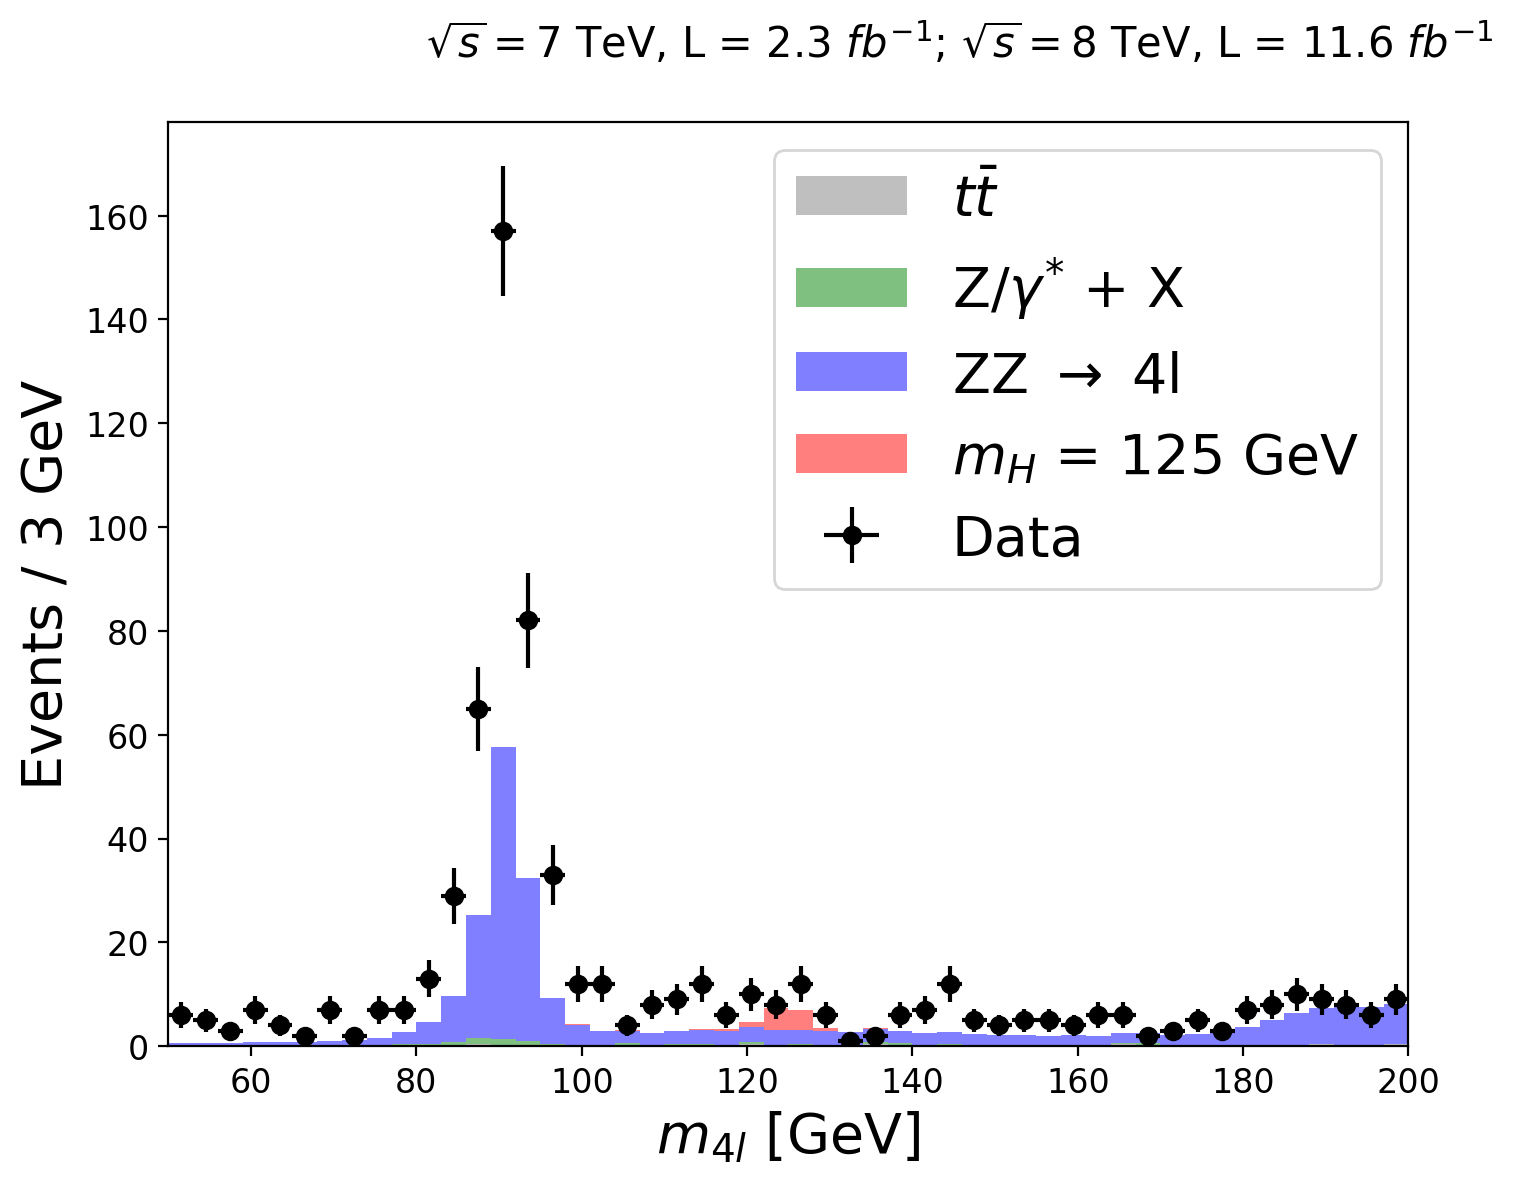

In [19]:
#>>>RUN: P10.3-runcell05

## Now Plot it!

def plotHists(ihist_mc,ihist_data,rmin=50,rmax=200,nbins=50):
    plt.figure(figsize = (8,6))
    # plt.style.use('mystyle.mplstyle')
    binwidth  = (rmax-rmin)//nbins
    bincenter = np.arange(rmin+binwidth*0.5,rmax+binwidth*0.5,binwidth)
    ## MC
    for i,pro in enumerate(ihist_mc):
        if i == 0:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
            alpha = 0.5)
            bot = pro
        else:
            stack = plt.bar(bincenter, pro, align = 'center', width = binwidth, color = colors[3-i], label=labels[3-i],
                 bottom = bot, alpha = 0.5)
            bot = bot + pro

    ## Measured data
    xerrs = [binwidth*0.5 for i in range(0, nbins)]
    yerrs = np.sqrt(ihist_data)
    marker_data = plt.errorbar(bincenter, ihist_data, xerr = xerrs, yerr = yerrs, linestyle = 'None', color = 'black',
                        marker = 'o', label = 'Data')

    plt.title('$ \sqrt{s} = 7$ TeV, L = 2.3 $fb^{-1}$; $\sqrt{s} = 8$ TeV, L = 11.6 $fb^{-1}$ \n', fontsize = 15, position=(0.64,0.95))
    plt.xlabel('$m_{4l}$ [GeV]',fontsize = 20, position=(0.92,0.1))
    plt.ylabel('Events / 3 GeV',fontsize = 20, position=(0.1,0.84))
    plt.xlim(rmin,rmax)
    plt.legend(fontsize = 20)
    plt.show()

plotHists(hist_mc,hist_data)

Try rerunning the cells, staring with `P10.3-runcell02`, and now set the values of `lowerMinMass` and `upperMinMass` to the suggested cuts from the previous section, in the function `evt`. Does this improve things (probably!).

In the problems that follow, we will do a bit more to find the Higgs boson! You can already kind of see it.

<h3>Performing a Blind Analysis</h3>

In particle physics, and also for the actual Higgs boson discovery in 2012, researchers perform "blind analysis". Blind analysis involves optimizing the selections with MC first without looking at the data. The selections are only applied to the data once they are finalized on the MC alone. This avoid the possibility of biasing the result toward researchers' preconceptions by preventing them from knowing the answer until the analysis is complete. Here this is not required, you can always look at your data and go back to modify your analysis flow. In fact, we will even analyze the MC to get an idea of what we should expect for our signal.

<a name='problems_10_3'></a>     

| [Top](#section_10_0) | [Restart Section](#section_10_3) |

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 10.3.1</span>

Now that you have run through making a plot, write a function `select_pairs` that improves the selections for lepton pairs. This function will be used in the function `env()` below, and after you write this implementation, you will have completed the full selection code!

The function that you will complete will take several parameters representing particle identifications (`PID`) and invariant masses (`m_z`) of different combinations of particles. It will filter out pairs of particles based on the `upperMinMass` and `lowerMinMass` thresholds.

Here are the particles that the IDs represent:

- `PID` = 11 (+electron)
- `PID` = -11 (-electron)
- `PID` = 13 (+muon)
- `PID` = -13 (-muon)

Among the 4 particles that we are considering as possible $ZZ^*$ decay products, there are 3 possible combinations of pairs. We will call these combinations `c1`, `c2`, and `c3`. Below we state the combinations and their respective invariant masses:

Combination 1: `c1`
- (`PID1`,`PID2`) and (`PID3`,`PID4`)
- `m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))`
- `m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))`

Combination 2: `c2`
- (`PID1`,`PID3`) and (`PID2`,`PID4`)
- `m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))`
- `m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))`

Combination 3: `c3`  
- (`PID1`,`PID4`) and (`PID2`,`PID3`)
- `m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))`
- `m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))`


<br>

**What the function should do:**

The function `select_pairs` should filter out particle pairs based on the following conditions (we implement the first selection criteria in the code, but you must complete the rest):

*One pair of muons and one pair of electrons:*

- **Selection Criteria 1:** If particle 1 is not the same type as particle 2 or particle 3, then it must be the same type as particle 4 (both either muons or electrons). This represents combination 3. In this case, the function should checks the invariant masses `m_z1_c3` and `m_z2_c3`. If the maximum of these masses is less than `upperMinMass`, or the minimum is less than `lowerMinMass`, the function returns 0.

- **Selection Criteria 2:** Else, if particle 1 is not the same type as particle 2, but is the same type as particle 3, then particle 2 and 4 must be the same type (both either muons or electrons). This represents combination 2. The function should check the invariant masses `m_z1_c2` and `m_z2_c2`. It should similarly implement the `upperMinMass` and `lowerMinMass` thresholds.

*All muons or all electrons:*

- **Selection Criteria 3:** If none of the above conditions are met, the particles must be all muons or all electrons. The function should implement the `upperMinMass` and `lowerMinMass` thresholds for all possible pairs: `m_z1_c1`, `m_z2_c1`, `m_z1_c2`, `m_z2_c2`, `m_z1_c3`, and `m_z2_c3`.

In [21]:
#>>>PROBLEM: P10.3.1
# Use this cell for drafting your solution (if desired),
# then enter your solution in the interactive problem online to be graded.

def select_pairs(PID1,PID2,PID3,m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3,upperMinMass,lowerMinMass):

    ### Selection Criteria 1
    ### 2mu2e event, combination c3
    if (abs(PID1) != PID2 and abs(PID1) != abs(PID3)):
        m_z1 = m_z1_c3
        m_z2 = m_z2_c3
        if max(m_z1,m_z2) < upperMinMass:
            return 0
        if min(m_z1,m_z2) < lowerMinMass:
            return 0

    ### Selection Criteria 2
    ### 2mu2e event, combination c2
    elif (abs(PID1) != PID2 and abs(PID1) == abs(PID3)):
        m_z1 = m_z1_c2
        m_z2 = m_z2_c2
        if max(m_z1,m_z2) < upperMinMass:
            return 0
        if min(m_z1,m_z2) < lowerMinMass:
            return 0

    ### Selection Criteria 3
    ### 4mu or 4e event, 3 different combinations
    else:
        m_z1 = max(m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3)
        m_z2 = min(m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3)
        if max(m_z1,m_z2) < upperMinMass:
            return 0
        if min(m_z1,m_z2) < lowerMinMass:
            return 0

    return 1

### <span style="border:3px; border-style:solid; padding: 0.15em; border-color: #90409C; color: #90409C;">Problem 10.3.2</span>

Run the code below to make a plot using the refined selection method. Be sure to again define the values of `lowerMinMass` and `upperMinMass` within the function (you could rewrite the function to take these as inputs, if you like).

Comment on the agreement between data and the simulated prediction. Is the data high or low compared to the simulation? Read the explanation for insight into what is happening.


<ipython-input-22-6e35d86cf5b4>:11: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
<ipython-input-22-6e35d86cf5b4>:16: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
<ipython-input-22-6e35d86cf5b4>:14: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
<ipython-input-22-6e35d86cf5b4>:13: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
<ipython-input-22-6e35d86cf5b4>:17: RuntimeWarning: invalid value encountered in sqrt
  m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))
<ipython-input-22-6e35d86cf5b4>:10: RuntimeWarning: invalid value encountered in sqrt
  m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
<ipython-i

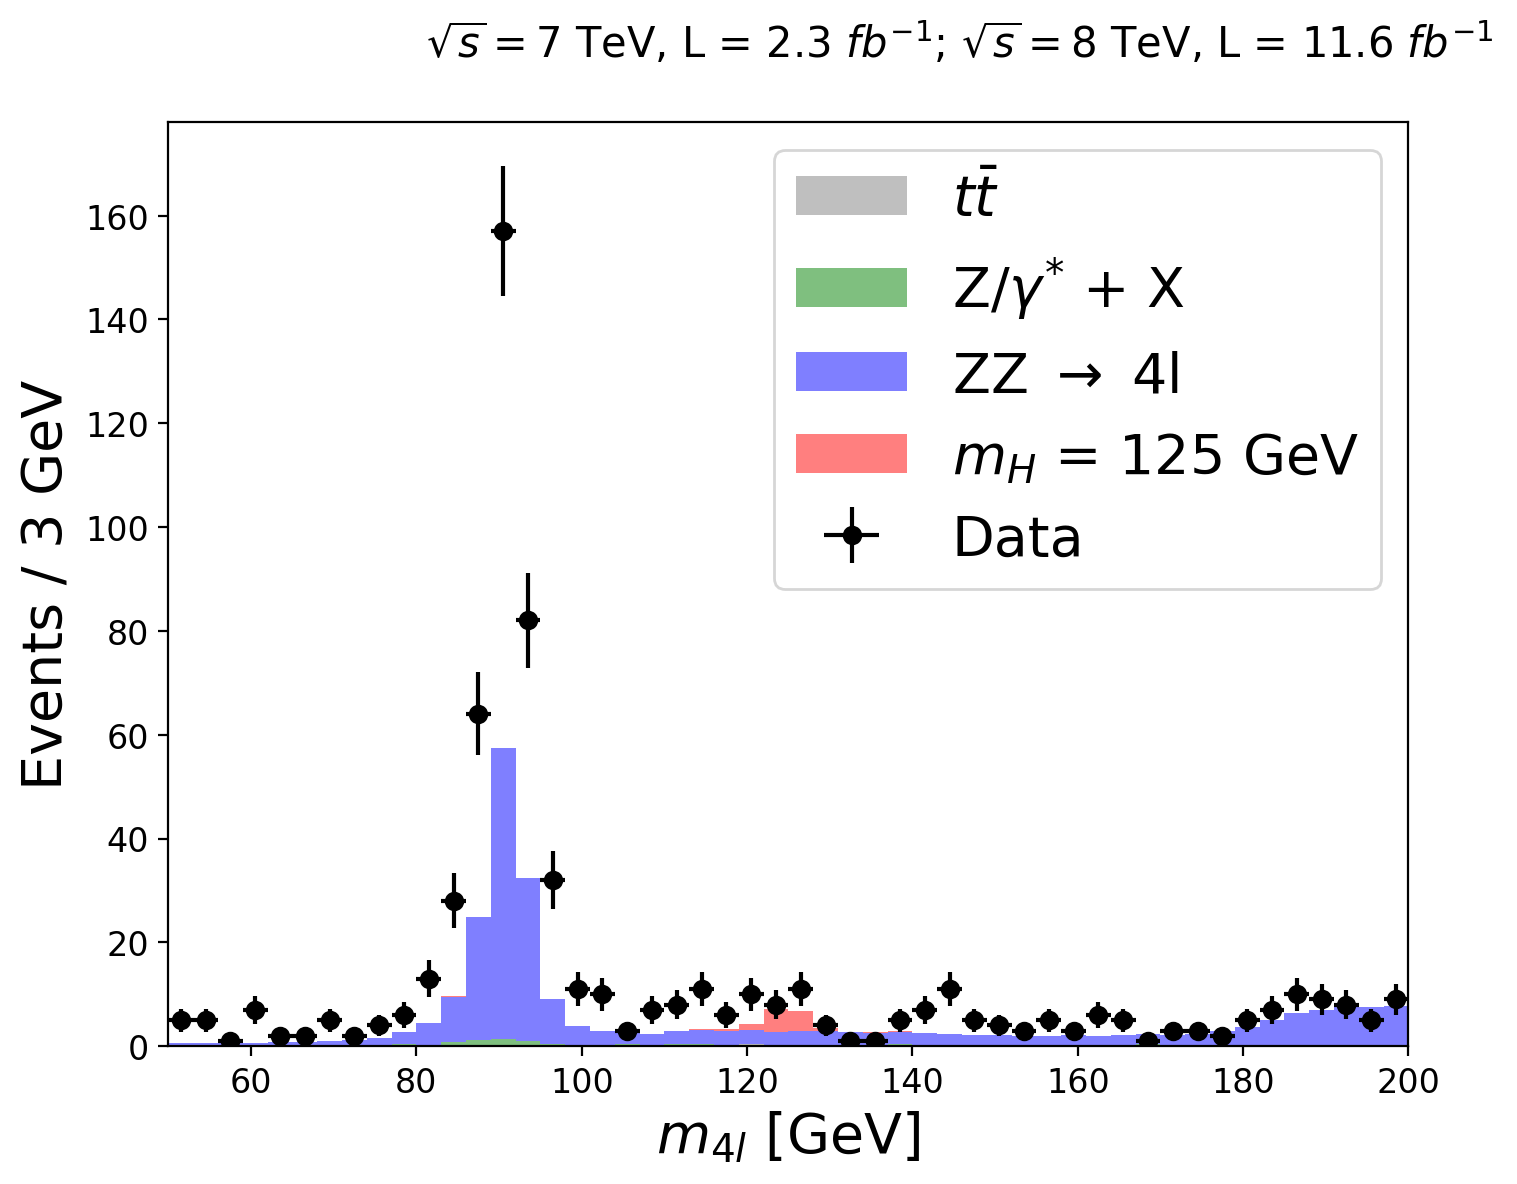

In [22]:
#>>>RUN: P10.3-runcell06

def evt(PID1,Q1,E1,px1,py1,pz1,PID2,Q2,E2,px2,py2,pz2,PID3,Q3,E3,px3,py3,pz3,PID4,Q4,E4,px4,py4,pz4):

    if PID1+PID2+PID3+PID4 != 0: #Charge conservation
        return 0

    ### All Pairwise Mass combinations
    ##c1
    m_z1_c1 = np.sqrt((E1+E2)**2 - ((px1+px2)**2 + (py1+py2)**2 + (pz1+pz2)**2))
    m_z2_c1 = np.sqrt((E3+E4)**2 - ((px3+px4)**2 + (py3+py4)**2 + (pz3+pz4)**2))
    ##c2
    m_z1_c2 = np.sqrt((E1+E3)**2 - ((px1+px3)**2 + (py1+py3)**2 + (pz1+pz3)**2))
    m_z2_c2 = np.sqrt((E2+E4)**2 - ((px2+px4)**2 + (py2+py4)**2 + (pz2+pz4)**2))
    ##c3
    m_z1_c3 = np.sqrt((E1+E4)**2 - ((px1+px4)**2 + (py1+py4)**2 + (pz1+pz4)**2))
    m_z2_c3 = np.sqrt((E2+E3)**2 - ((px2+px3)**2 + (py2+py3)**2 + (pz2+pz3)**2))

    ###NOTE: IF YOU DID NOT PREVIOUSLY DEFINE THE `lowerMinMass` and `upperMinMass`, do so here
    lowerMinMass = 0 #YOUR VALUE HERE
    upperMinMass = 0 #YOUR VALUE HERE

    if select_pairs(PID1,PID2,PID3,m_z1_c1,m_z2_c1,m_z1_c2,m_z2_c2,m_z1_c3,m_z2_c3,upperMinMass,lowerMinMass) == 0:
      return 0

    return 1


objsel(data)
evtsel(data)
sel_data = data.query('PassObj == 1 and PassEvt == 1')
mc_all,mc_sig,mc_bkg_zz,mc_bkg_dy,mc_bkg_tt=loadMC()
for i,bkg in enumerate(mc_all):
    for j,pro in enumerate(bkg):
        objsel(pro)
        evtsel(pro)
        mc_all[i][j] = pro.query('PassObj == 1 and PassEvt == 1')

hist_mc,hist_data=makeAllHists(sel_data,mc_all)
plotHists(hist_mc,hist_data)